In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=['SimHei']#用来正常显示中文标签  
plt.rcParams["axes.unicode_minus"]=False#用来正常显示负号

In [50]:
data=pd.read_csv("/Users/philyu/Library/Application Support/Kim (Kim)/userData/1d462af5bdfa4abca3ab63759ff07363/Kim file/2020-12/1030-1111_支付日期未来X天内品质退款率-商品粒度.csv")

In [51]:
data.head()

,pay_date,seller_id,seller_name,item_id,is_cps,source_type,item_title,item_link_url,on_offline_status,item_status,...,within7_refound_cnt,within10_refound_cnt,within14_refound_cnt,within20_refound_cnt,within30_refound_cnt,within7_refound_rate,within10_refound_rate,within14_refound_rate,within20_refound_rate,within30_refound_rate
0,20201109,1174902523,鼎诚 商贸,622398860523,0,98,闪电购商品47,https://www.kwaishop.com/merchant/shop/order/n...,1,2,...,1,1,1,1,1,0.250000,0.250000,0.250000,0.250000,0.250000
1,20201103,446327629,张永青（小号）,410958670629,0,99,椰风星钻口红,https://app.kwaixiaodian.com/merchant/shop/det...,1,1,...,1,1,1,1,1,0.250000,0.250000,0.250000,0.250000,0.250000
2,20201105,327968736,柚柚家【感谢有你】,551333438736,0,99,500毫升304运动保温杯,https://app.kwaixiaodian.com/merchant/shop/det...,1,1,...,2,2,2,2,2,0.048780,0.048780,0.048780,0.048780,0.048780
3,20201105,236132885,艾尼•品质穿搭,573146688885,0,99,加厚美臀裤2071,https://app.kwaixiaodian.com/merchant/shop/det...,1,1,...,1,1,1,1,1,0.062500,0.062500,0.062500,0.062500,0.062500
4,20201107,612348168,AA新潮名品服装城,603755239168,0,99,加绒保暖打底衫2号(原厂正版),https://app.kwaixiaodian.com/merchant/shop/det...,0,1,...,1,1,1,1,1,0.333333,0.333333,0.333333,0.333333,0.333333


### 7日品退率计算

In [55]:
#按日期分组计算
data_7_1=data.groupby("pay_date")[["within7_refound_cnt","order_count"]].sum()
data_7_1.index#["pay_date"]

Int64Index([20201030, 20201031, 20201101, 20201102, 20201103, 20201104,
            20201105, 20201106, 20201107, 20201108, 20201109, 20201110,
            20201111],
           dtype='int64', name='pay_date')

In [56]:
#时间列建立，需要根据业务时间调整
def get_date_list(begin_date,end_date):
    date_list = [x.strftime('%Y-%m-%d') for x in list(pd.date_range(start=begin_date, end=end_date))]
    return date_list
data_7_1["date"]=get_date_list('2020-10-30','2020-11-11')
data_7_1.set_index('date',inplace=True)

In [57]:
#7天品退率计算
import numpy as np
data_7_1.loc[:,"7天品退率"]=(data_7_1["within7_refound_cnt"]/data_7_1["order_count"])*10000
data_7_1.loc[:,"7天品退率均值"]=sum(data_7_1.loc[:,"7天品退率"])/data_7_1.loc[:,"7天品退率"].count()
data_7_1

,within7_refound_cnt,order_count,7天品退率,7天品退率均值
date,,,,
2020-10-30,8696,2921157,29.769026,34.913251
2020-10-31,8295,2873172,28.870531,34.913251
2020-11-01,7640,1764962,43.287051,34.913251
2020-11-02,8210,2057532,39.902174,34.913251
2020-11-03,7900,1943077,40.657164,34.913251
2020-11-04,8116,2265590,35.822898,34.913251
2020-11-05,8745,4567895,19.144486,34.913251
2020-11-06,10534,3412346,30.870258,34.913251
2020-11-07,9140,3397721,26.900384,34.913251


<AxesSubplot:title={'center':'7天品退率'}, xlabel='date'>

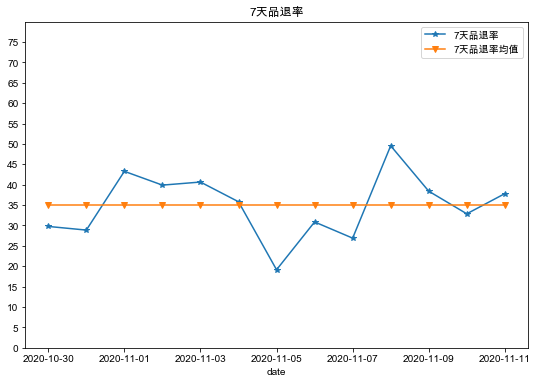

In [71]:
#7天品退率画图
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"]='Arial Unicode MS'
#from matplotlib.font_manager import FontProperties
fig,ax=plt.subplots(1,1,figsize=(9,6))
# 解决中文显示问题
data_7_1["7天品退率"].plot(marker='*',xticks=None,ylim=[0,80],yticks=range(0,80,5),title ="7天品退率",legend=True)
data_7_1["7天品退率均值"].plot(marker='v',legend=True)

### 30日品退率计算 

In [59]:
#按日期分组计算
data_30_1=data.groupby("pay_date")[["within30_refound_cnt","order_count"]].sum()
data_30_1.index#["pay_date"]

Int64Index([20201030, 20201031, 20201101, 20201102, 20201103, 20201104,
            20201105, 20201106, 20201107, 20201108, 20201109, 20201110,
            20201111],
           dtype='int64', name='pay_date')

In [62]:
#时间列建立，需要根据业务时间调整
def get_date_list(begin_date,end_date):
    date_list = [x.strftime('%Y-%m-%d') for x in list(pd.date_range(start=begin_date, end=end_date))]
    return date_list
data_30_1["date"]=get_date_list('2020-10-30','2020-11-11')
data_30_1.set_index('date',inplace=True)

In [63]:
#30天品退率计算
import numpy as np
data_30_1.loc[:,"30天品退率"]=(data_30_1["within30_refound_cnt"]/data_30_1["order_count"])*10000
data_30_1.loc[:,"30天品退率均值"]=sum(data_30_1.loc[:,"30天品退率"])/data_30_1.loc[:,"30天品退率"].count()
#data_30_2=pd.concat(data_30_1,data["pay_date"])
data_30_1

,within30_refound_cnt,order_count,30天品退率,30天品退率均值
date,,,,
2020-10-30,12438,2921157,42.579019,52.103914
2020-10-31,13025,2873172,45.333172,52.103914
2020-11-01,10147,1764962,57.491323,52.103914
2020-11-02,12042,2057532,58.526429,52.103914
2020-11-03,11508,1943077,59.225651,52.103914
2020-11-04,11452,2265590,50.547539,52.103914
2020-11-05,14313,4567895,31.333908,52.103914
2020-11-06,16521,3412346,48.415372,52.103914
2020-11-07,15972,3397721,47.007980,52.103914


<AxesSubplot:title={'center':'30天品退率'}, xlabel='date'>

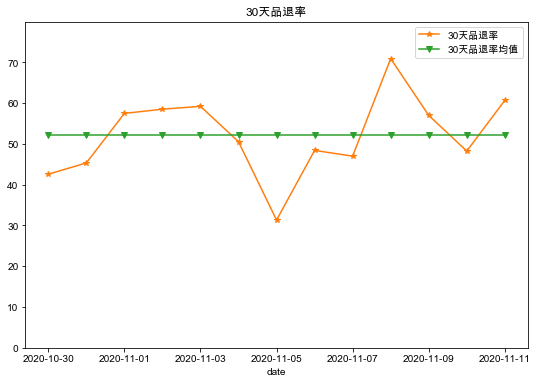

In [72]:
#30天品退率画图
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"]='Arial Unicode MS'
#from matplotlib.font_manager import FontProperties
fig,ax=plt.subplots(1,1,figsize=(9,6))
ax2=plt.plot(0.5)
# 解决中文显示问题
data_30_1["30天品退率"].plot(marker='*',xticks=None,ylim=[0,80],yticks=range(0,80,10),title ="30天品退率",legend=True)
data_30_1["30天品退率均值"].plot(marker='v',legend=True)